In [3]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [4]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)


In [5]:
#lines = open(args['problem'], 'r').readlines()
#args['lines'] = lines
#lines

In [6]:
lines = [
    '(param (A B C D) polygon)',
    '(param C1 circle)',
    '(define L1 line (reflect-ll (line C D) (line A B)))',
    '(param F point (in-poly A B C D))',
    '(param G point (on-line L1))',
    '(define H point (inter-lc L1 C1 (rs-closer-to-p A)))',

    # '(param A point)',
    # '(param B point)',
    # '(param C point)',
    # #'(param C1 circle)',
    # '(define D point (excenter A B C))',
    # '(define C2 circle (excircle A B C))',
    # '(define C1 circle (circumcircle A B C))',
    # #'(define L1 line (connecting A B))\n',
    # #'(eval (coll A B C))'

    # '(param A point)',
    # '(param B point)',
    # '(define L1 line (line A B))',

]
args['lines'] = lines

In [7]:
#args['dir'] = '../test_new_functions'

Processing instructions...:   0%|          | 0/6 [00:00<?, ?it/s]

INPUT INSTRUCTIONS:
sample (A B C D) polygon ()
parameterize C1 circle
define L1 ((reflect-ll (connecting C D) (connecting A B)))
parameterize F (in-poly A B C D)
parameterize G (on-line L1)
define H ((inter-lc L1 C1 (root-closer-to-p A)))


Sampling initializations...: 100%|██████████| 10/10 [01:01<00:00,  6.13s/it]


[     0]   0.132705992243 ||   0.100000
======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0560339433
  polygon-first-eq-last                              0.0614189553
  polygon-first-angle-eq-sampled                     0.0150287016
  G_line_regularization                              0.0002156052
  interLC_H                                          0.0000000000
  points                                             0.0000087868
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


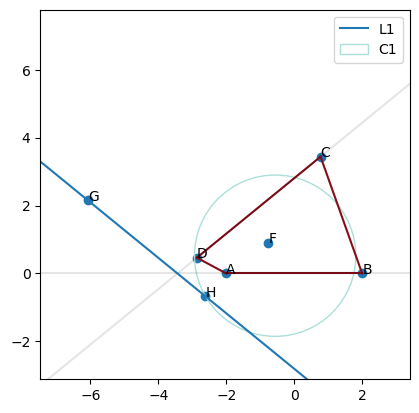

======== Print losses ==========
-- Losses --
  polygon-angle-sum                                  0.0000089297
  polygon-first-eq-last                              0.0008891404
  polygon-first-angle-eq-sampled                     0.0000015746
  G_line_regularization                              0.0000000080
  interLC_H                                          0.0000000000
  points                                             0.0000061712
  distinct                                           0.0000000000
-- Goals --
-- NDGs --


Found 1 models


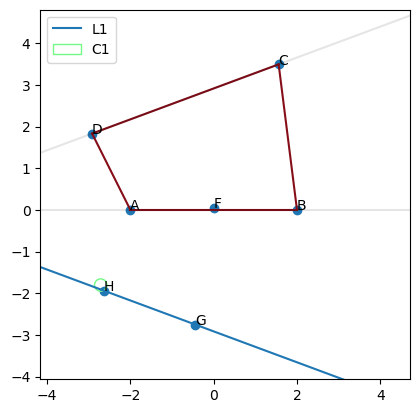

[None]

In [8]:
build(args)